<a href="https://colab.research.google.com/github/aman5898/Data-Science-December/blob/main/22-01-07-EndToEndProject/ClassWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Understand Bussiness problem
*   Get the Data
*   Visualize
*   feature engineering  (model readable)
*   pipeline
*   select and train model
*   fine tuning


# Get The Data

In [1]:
import pandas as pd

df = housing = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-California-Housing-Prices/master/Data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.sample(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9559,-120.60,37.37,10.0,3075.0,498.0,1368.0,487.0,4.6667,130100.0,INLAND
9941,-122.25,38.17,34.0,778.0,137.0,406.0,136.0,4.2955,121300.0,NEAR BAY
3205,-119.62,36.35,10.0,3674.0,734.0,1864.0,718.0,2.6145,80300.0,INLAND
14791,-117.11,32.58,28.0,1869.0,407.0,1074.0,344.0,2.5988,135600.0,NEAR OCEAN
14995,-117.04,32.73,36.0,2084.0,400.0,1097.0,398.0,3.2717,130700.0,NEAR OCEAN
11183,-117.94,33.82,27.0,1366.0,326.0,878.0,325.0,3.4000,196900.0,<1H OCEAN
13998,-116.96,34.83,30.0,1211.0,289.0,611.0,230.0,1.6667,44700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing['housing_median_age'] = housing['housing_median_age'].astype('int32')

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int32  
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), int32(1), object(1)
memory usage: 1.5+ MB


# Visualize

In [7]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


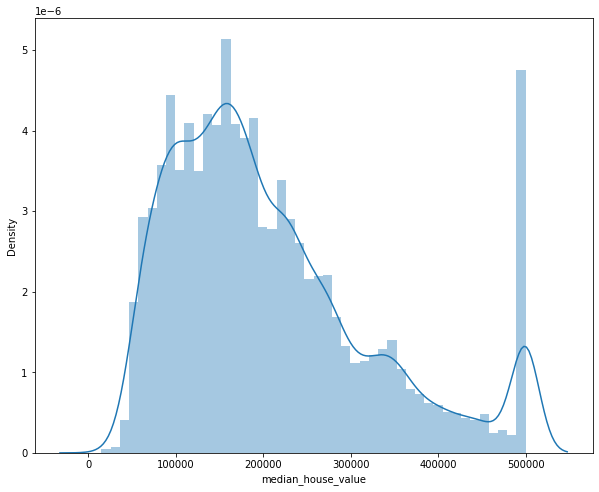

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.distplot(housing['median_house_value'])
plt.show()

In [9]:
housing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

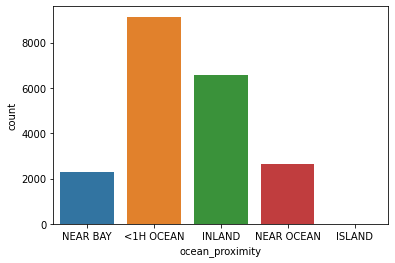

In [11]:
sns.countplot(data = housing, x = 'ocean_proximity')

In [12]:
import plotly.express as px

px.box(df, x='ocean_proximity', y='median_house_value')

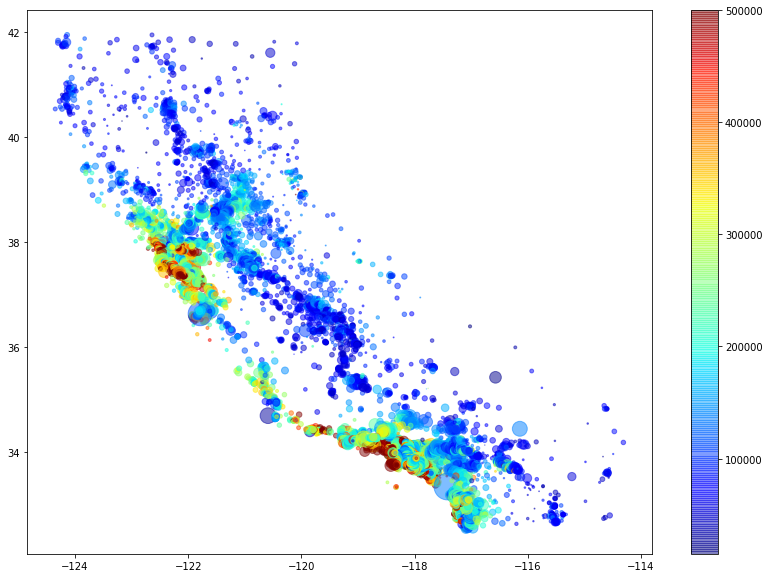

In [13]:
plt.figure(figsize = (14, 10))

plt.scatter(housing['longitude'], housing['latitude'], c = housing['median_house_value'], s=housing['population']/50, alpha=0.5, cmap='jet')
plt.colorbar()

plt.show()

In [14]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


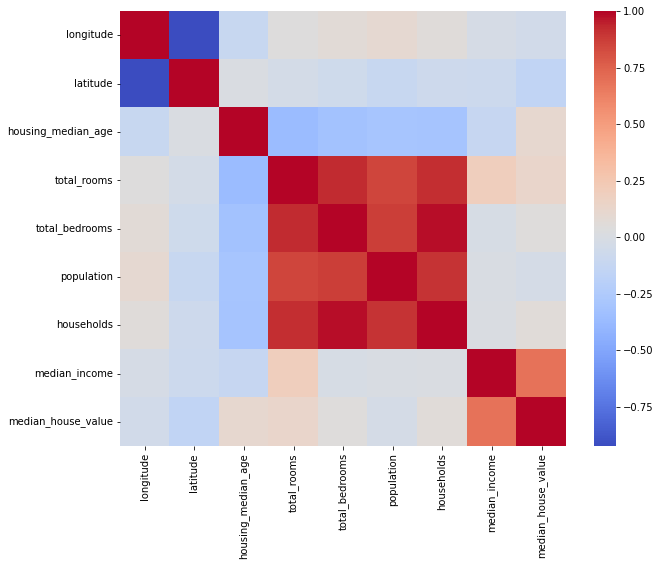

In [15]:
plt.figure(figsize = (10, 8))

sns.heatmap(df.corr(), cmap='coolwarm')

In [16]:
df.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**plot all numerical features agains each other scatter matrix**

# Feature Engineering

## Experiment with Columns

In [17]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
housing['roomsperhouse'] = housing['total_rooms'] / housing['households']

In [19]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsperhouse
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


In [20]:
housing['populationperhouse'] = housing['population'] / housing['households']
housing['bedroomperroom'] = housing['total_bedrooms'] / housing['total_rooms']

In [21]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
roomsperhouse         0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
populationperhouse   -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedroomperroom       -0.255880
Name: median_house_value, dtype: float64

In [22]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
roomsperhouse           0
populationperhouse      0
bedroomperroom        207
dtype: int64

# Preparing dataset for ML Algorithm

## Missing Data


*   drop col
*   drop row
*   fill some info


In [23]:
housing['total_bedrooms'].median()

435.0

In [24]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].median())
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
roomsperhouse           0
populationperhouse      0
bedroomperroom        207
dtype: int64

In [25]:
housing['bedroomperroom'] = housing['total_bedrooms'] / housing['total_rooms']

In [45]:
from sklearn.impute import SimpleImputer

ss = SimpleImputer(strategy = 'median')

ss.fit(housing[['total_bedrooms']])

SimpleImputer(strategy='median')

In [46]:
ss.transform(housing[['total_bedrooms']])

array([[ 129.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

## Text & Categorical Values

Most Machine Learning algorithms prefer to work with numbers, so replacing string with numbers.

*   OrdinalEncoder (comparable or rank)
*   OneHotEncoder (not comparable)


**Ordinal Encoder**

replace comparable with numbers example(poor, average, good)

Marks     Grade

30         D

50         C

70         B

100        A


convert all grades to numbers from 0 to 3

Marks     Grade

30         0

50         1

70         2

100        3

Logic higher the marks higher the grade

**OneHotEncoder**

Marks     State

30         delhi

50         up

70         bihar

100        chhattisgarh

convert all State to numbers from 0 to 3

Marks     State

30         0

50         1

70         2

100        3


### OrdinalEncoder

In [26]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [27]:
from sklearn import preprocessing

od = preprocessing.OrdinalEncoder(categories = [
                                   ['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
])

od.fit(housing[['ocean_proximity']])

OrdinalEncoder(categories=[['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY',
                            'ISLAND']])

In [36]:
od.fit_transform(housing[['ocean_proximity']])

In [28]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsperhouse,populationperhouse,bedroomperroom
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


In [29]:
od.transform( housing[['ocean_proximity']] )

array([[3.],
       [3.],
       [3.],
       ...,
       [0.],
       [0.],
       [0.]])

### OneHotEncoder

In [30]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,roomsperhouse,populationperhouse,bedroomperroom
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892
20639,-121.24,39.37,16,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,5.254717,2.616981,0.221185


In [31]:
pd.get_dummies(housing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [32]:
oh = preprocessing.OneHotEncoder()

oh.fit_transform(housing[['ocean_proximity']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Scaling

*   Standardiztion
*   Normalization

In [33]:
ss = preprocessing.StandardScaler()

ss.fit(housing.drop('ocean_proximity', axis = 1))

ss.transform(housing.drop('ocean_proximity', axis = 1))

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

# Pipelining

In [42]:
housing_X = housing.drop(['median_house_value'], axis = 1)
housing_X.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,roomsperhouse,populationperhouse,bedroomperroom
7704,-118.14,33.96,34,2744.0,541.0,1333.0,503.0,4.0536,<1H OCEAN,5.455268,2.650099,0.197157
3673,-118.39,34.22,40,712.0,149.0,533.0,155.0,3.6950,<1H OCEAN,4.593548,3.438710,0.209270
12536,-121.51,38.55,45,3032.0,631.0,1341.0,597.0,2.8417,INLAND,5.078727,2.246231,0.208113


In [43]:
housing_Y = housing['median_house_value']
housing_Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [51]:
import numpy as np

numeric_columns = np.array(housing_X.drop(['ocean_proximity'], axis = 1).columns)
cat_columns = ['ocean_proximity']

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

od = preprocessing.OrdinalEncoder(categories = [
                                   ['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
])

numerical_pipeline = Pipeline([
                               ('imputer', SimpleImputer(strategy = 'median')),
                               ('scaler', preprocessing.StandardScaler())
                               ]
)

complete_pipeline = ColumnTransformer([
        ('cat', od, cat_columns),
        ('num', numerical_pipeline, numeric_columns)
])

# Select and train model

In [60]:
X = complete_pipeline.fit_transform(housing_X)
y = housing_Y

## LinearRegression

In [61]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

lin.fit(X, y)

LinearRegression()

In [64]:
y_pred = lin.predict(X)

In [63]:
X.shape

(20640, 12)

In [65]:
y_pred.shape

(20640,)

In [ ]:
for res in zip(y, y_pred):
  print(res)

**MSE** = sum((y-y_pred)^2) / N

In [68]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse

4743931626.928954

In [71]:
np.sqrt(mse)

68876.20508513048

## DesisionTree

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X, y)

DecisionTreeRegressor()

In [73]:
y_pred = tree.predict(X)

In [74]:
mse = mean_squared_error(y, y_pred)
mse

0.0

**OverFitting**

In [ ]:
for res in zip(y, y_pred):
  print(res)

## Validation



*   Hold-out
*   cross-validation



In [77]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y)

In [78]:
x_train.shape, y_train.shape

((15480, 12), (15480,))

In [79]:
x_val.shape, y_val.shape

((5160, 12), (5160,))

In [80]:
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [81]:
y_pred = tree.predict(x_val)

In [83]:
mse = mean_squared_error(y_val, y_pred)
mse

4863710552.174418

## RandomForest

In [84]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [85]:
y_pred = forest.predict(x_val)

In [86]:
mean_squared_error(y_val, y_pred)

2401370656.6616673

In [88]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(forest, X, y, cv = 4)

In [91]:
mean_squared_error(y, y_pred)

4682644626.213153

## Save The Model

joblib
pickel

In [93]:
import joblib

joblib.dump(forest, 'model')

['model']

In [94]:
model = joblib.load('model')

In [133]:
!ls -l  ./model

-rw-r--r-- 1 root root 120117899 Jan  7 15:59 ./model


In [96]:
mean_squared_error(model.predict(x_val), y_val)

2401370656.6616673

## HyperParameter Tuning





In [100]:
forest = RandomForestRegressor(n_estimators = 150, max_features=4)

forest.fit(x_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=150)

In [101]:
y_pred = forest.predict(x_val)

In [102]:
mean_squared_error(y_val, y_pred)

2262334307.5817623

### GridSearchCV

In [137]:
from sklearn.model_selection import GridSearchCV

params = [
          {'n_estimators': [4, 6, 7], 'max_features': [2, 6]}, # 12
          {'bootstrap': [True, False], 'max_depth' : [2,4], 'max_features': [2]} # 12
        ]

gscv = GridSearchCV(forest, params, scoring = 'neg_mean_squared_error', cv = 3, n_jobs=-1)

In [138]:
gscv.fit(X, y)

KeyboardInterrupt: ignored

In [ ]:
gscv.cv_results_

In [ ]:
params = gscv.cv_results_['params']
scores = gscv.cv_results_['mean_test_score']

for res in zip(params, scores):
  print(res[0], -res[1])

In [ ]:
len(gscv.cv_results_.['params'])

In [115]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [4, 6, 7, 10, 8, 9, 11, 12], 'max_features': [1, 2, 4, 5, 6, 7, 8]}

rscv = RandomizedSearchCV(forest, params, scoring = 'neg_mean_squared_error', cv = 3)

rscv.fit(X, y)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_features=4,
                                                   n_estimators=150),
                   param_distributions={'max_features': [1, 2, 4, 5, 6, 7, 8],
                                        'n_estimators': [4, 6, 7, 10, 8, 9, 11,
                                                         12]},
                   scoring='neg_mean_squared_error')

In [117]:
rscv.cv_results_['params']

[{'max_features': 8, 'n_estimators': 10},
 {'max_features': 5, 'n_estimators': 12},
 {'max_features': 8, 'n_estimators': 12},
 {'max_features': 1, 'n_estimators': 8},
 {'max_features': 2, 'n_estimators': 9},
 {'max_features': 8, 'n_estimators': 11},
 {'max_features': 2, 'n_estimators': 4},
 {'max_features': 1, 'n_estimators': 10},
 {'max_features': 7, 'n_estimators': 7},
 {'max_features': 8, 'n_estimators': 4}]

In [119]:
params = rscv.cv_results_['params']
scores = rscv.cv_results_['mean_test_score']

for res in zip(params, scores):
  print(res[0], -res[1])

{'n_estimators': 10, 'max_features': 8} 5208794973.798734
{'n_estimators': 12, 'max_features': 5} 4969769272.221011
{'n_estimators': 12, 'max_features': 8} 5202015181.391368
{'n_estimators': 8, 'max_features': 1} 5630910143.980464
{'n_estimators': 9, 'max_features': 2} 5035271891.768856
{'n_estimators': 11, 'max_features': 8} 5291685729.255799
{'n_estimators': 4, 'max_features': 2} 5693755240.306235
{'n_estimators': 10, 'max_features': 1} 5371604256.554564
{'n_estimators': 7, 'max_features': 7} 5459461410.874937
{'n_estimators': 4, 'max_features': 8} 6447348697.754985


In [ ]:
forest = RandomForestRegressor(n_estimators=4000)

forest.fit(X, y)
y_pred = forest.predict(X)

In [ ]:
mean_squared_error(y, y_pred)